# Projeto Nanodegree

## Alunos:
- **Bruno Pasquetti**
- **Gabriel Brocco de Oliveira**
- **Pedro Henrique de Bortoli**
- **Rafael Augusto Klein**

---

## Sum√°rio do Projeto: Previs√£o de Evas√£o de Alunos

### 1. Introdu√ß√£o e Objetivos
#### 1.1. Contexto do Problema
#### 1.2. Objetivos da An√°lise
- An√°lise Explorat√≥ria
- Engenharia de Features
- Modelagem Preditiva
- Valida√ß√£o
#### 1.3. Dicion√°rio de Vari√°veis
- **`ds_`**: Colunas categ√≥ricas (descritivas).
- **`ts_`**: Colunas temporais (timestamps).
- **`nr_`**: Colunas num√©ricas de contagem.
- **`vl_`**: Colunas num√©ricas de valores ou m√©dias.

### 2. Configura√ß√£o do Ambiente

### 3. Carga e An√°lise Inicial dos Dados

### 4. Limpeza e Pr√©-Processamento dos Dados
#### 4.1. Remo√ß√£o de Colunas e Registros Inv√°lidos
#### 4.2. Tratamento de Colunas Temporais e Categ√≥ricas
#### 4.3. Tratamento de Valores Ausentes (Nulos)
- Remo√ß√£o de colunas
- Preenchimento com zero
- Preenchimento com a mediana

### 5. An√°lise Explorat√≥ria de Dados (EDA)
#### 5.1. An√°lise de Engajamento por Cidade
#### 5.2. Distribui√ß√£o do Desempenho Geral dos Alunos
#### 5.3. An√°lise de Inatividade

### 6. Engenharia e Sele√ß√£o de Features
#### 6.1. Cria√ß√£o da Vari√°vel `evadiu`
#### 6.2. Classifica√ß√£o de Perfis de Risco
#### 6.3. Prepara√ß√£o dos Dados para Modelagem

### 7. Modelagem
#### 7.1. Regress√£o Log√≠stica
#### 7.2. Random Forest
#### 7.3. Rede Neural

### 8. Valida√ß√£o e Compara√ß√£o dos Modelos
#### 8.1. Valida√ß√£o Cruzada
#### 8.2. Matrizes de Confus√£o

### 9. Avalia√ß√£o Final no Conjunto de Teste Real
#### 9.1. Prepara√ß√£o dos Dados de Teste
#### 9.2. Performance do Modelo Final
#### 9.3. Curvas ROC e Precis√£o vs. Recall
#### 9.4. An√°lise da Propor√ß√£o de Evasores

---

## 1. Introdu√ß√£o E Objetivos

### 1.1 Contexto do Problema
A evas√£o de alunos √© um dos maiores desafios para plataformas de ensino online. Identificar estudantes em risco de abandonar um curso permite que a institui√ß√£o tome a√ß√µes proativas, como oferecer suporte personalizado, ajustar o conte√∫do ou criar campanhas de reengajamento.

Este projeto foca em analisar dados de intera√ß√£o de alunos em um curso online s√≠ncrono da PensComp para construir um modelo preditivo de evas√£o.

### 1.2 Objetivos da An√°lise
- **1.** **An√°lise Explorat√≥ria**: Entender o comportamento dos alunos, identificando padr√µes de uso e engajamento.
- **2.** **Engenharia de Features**: Criar vari√°veis que ajudem a identificar o risco de evas√£o, como um indicador de "evadiu" e perfis de risco.
- **3.** **Modelagem Preditiva**: Treinar e avaliar diferentes modelos de Machine Learning (Regress√£o Log√≠stica, Random Forest e Redes Neurais) para prever a probabilidade de um aluno evadir.
- **4.** **Valida√ß√£o**: Testar o modelo final em um conjunto de dados real e n√£o visto para avaliar sua performance em um cen√°rio pr√°tico.

### 1.3 Dicion√°rio de Vari√°veis

O conjunto de dados cont√©m informa√ß√µes sobre a atividade e o desempenho dos alunos. As colunas s√£o agrupadas por prefixos:

- **ds_***: Colunas categ√≥ricas (descritivas).
- **ts_***: Colunas temporais (timestamps).
- **nr_***: Colunas num√©ricas de contagem.
- **vl_***: Colunas num√©ricas de valores ou m√©dias.

## 2. Configura√ß√£o do Ambiente

Nesta se√ß√£o, importamos todas as bibliotecas necess√°rias para a an√°lise, pr√©-processamento e modelagem

In [235]:
# Instala√ß√£o de biblioteca para tratamento de strings (acentos)
!pip install unidecode

# Bibliotecas para manipula√ß√£o e an√°lise de dados
import pandas as pd
import numpy as np
import unidecode

# Bibliotecas para visualiza√ß√£o de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas de Machine Learning e pr√©-processamento
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve

# Bibliotecas para Redes Neurais com TensorFlow/Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Configura√ß√µes de visualiza√ß√£o
sns.set_style("whitegrid")
%matplotlib inline

## 3. Carga e An√°lise Inicial dos Dados

Carregamos os dados de treino e realizamos uma verifica√ß√£o inicial para entender sua estrutura, tipos de dados e a presen√ßa de valores ausentes.

In [236]:
# Carregamento do dataset de treino
df = pd.read_csv('dados_projeto_evasao_treino - Copia.csv')

In [237]:
# Verificando a estrutura e os tipos de dados do DataFrame
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 37 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            400 non-null    int64  
 1   ds_cidade_usuario                     346 non-null    object 
 2   ts_primeiro_acesso                    400 non-null    int64  
 3   ts_ultimo_acesso                      400 non-null    int64  
 4   nr_dias_desde_primeiro_acesso         400 non-null    int64  
 5   nr_dias_desde_ultimo_acesso           400 non-null    int64  
 6   nr_atividades_sinalizadas             400 non-null    int64  
 7   nr_atividades_mapeadas                400 non-null    int64  
 8   nr_discussoes_forum_postadas          400 non-null    int64  
 9   nr_questionarios_abandonados          400 non-null    int64  
 10  nr_questionarios_finalizados          400 non-null    int64  
 11  vl_medio_tempo_ques

In [238]:
# Amostra dos dados
df.head()

Unnamed: 0 ds_cidade_usuario  ts_primeiro_acesso  ts_ultimo_acesso  \
0           1          Campinas                   0                 0   
1           3          Campinas                   0                 0   
2           4          Campinas                   0                 0   
3           5               NaN          1692744534        1693928454   
4           6          Campinas                   0                 0   

   nr_dias_desde_primeiro_acesso  nr_dias_desde_ultimo_acesso  \
0                          19612                        19612   
1                          19612                        19612   
2                          19612                        19612   
3                             20                            6   
4                          19612                        19612   

   nr_atividades_sinalizadas  nr_atividades_mapeadas  \
0                          0                       0   
1                          0                       0   
2                          0                       0   
3                          0                       4   
4                          0                       0   

   nr_discussoes_forum_postadas  nr_questionarios_abandonados  ...  \
0                             0                             0  ...   
1                             0                             0  ...   
2                             0                             0  ...   
3                             0                             0  ...   
4                             0                             0  ...   

   nr_questoes_parciais  vl_desempenho_usuario  vl_media_questoes_por_dia  \
0                     0                    NaN                        NaN   
1                     0                    NaN                        NaN   
2                     0                    NaN                        NaN   
3                     0                    1.0                        NaN   
4                     0                    NaN                        NaN   

   vl_engajamento_notas  nr_itens_avaliados  nr_itens_nao_respondidos  \
0                   NaN                   0                         0   
1                   NaN                   0                         0   
2                   NaN                   0                         0   
3                   NaN                   1                        62   
4                   NaN                   0                         0   

   vl_media_notas  nr_submissoes_codigo  vl_media_submissoes_codigo  \
0             NaN                     0                         NaN   
1             NaN                     0                         NaN   
2             NaN                     0                         NaN   
3             1.0                     0                         NaN   
4             NaN                     0                         NaN   

   vl_submissoes_por_dias_ativos  
0                            NaN  
1                            NaN  
2                            NaN  
3                            NaN  
4                            NaN  

[5 rows x 37 columns]

In [239]:
# Classifica√ß√£o das colunas por tipo de prefixo
categoricas = [col for col in df.columns if col.startswith("ds_")]
temporais = [col for col in df.columns if col.startswith("ts_")]
numericas_nr = [col for col in df.columns if col.startswith("nr_")]
numericas_vl = [col for col in df.columns if col.startswith("vl_")]

print("\nColunas categ√≥ricas:", categoricas)
print("Colunas temporais:", temporais)
print("Colunas num√©ricas (contagem - nr_):", numericas_nr)
print("Colunas num√©ricas (valores/escalares - vl_):", numericas_vl)


Colunas categ√≥ricas: ['ds_cidade_usuario']
Colunas temporais: ['ts_primeiro_acesso', 'ts_ultimo_acesso']
Colunas num√©ricas (contagem - nr_): ['nr_dias_desde_primeiro_acesso', 'nr_dias_desde_ultimo_acesso', 'nr_atividades_sinalizadas', 'nr_atividades_mapeadas', 'nr_discussoes_forum_postadas', 'nr_questionarios_abandonados', 'nr_questionarios_finalizados', 'nr_intervalos_uso', 'nr_dias_uso', 'nr_interacoes_usuario', 'nr_dias_engajamento_discussao', 'nr_dias_engajamento_questionario', 'nr_engajamento_discussao', 'nr_engajamento_questionario', 'nr_questoes_respondidas', 'nr_questoes_corretas', 'nr_questoes_erradas', 'nr_questoes_parciais', 'nr_itens_avaliados', 'nr_itens_nao_respondidos', 'nr_submissoes_codigo']
Colunas num√©ricas (valores/escalares - vl_): ['vl_medio_tempo_questionario', 'vl_medio_tempo_questionario_avaliado', 'vl_desempenho_questionario', 'vl_medio_atividade_diaria', 'vl_engajamento_usuario_por_intervalo', 'vl_engajamento_usuario_intradia', 'vl_desempenho_usuario', 'v

### Analise Inicial:
- O dataset possui 400 linhas e 37 colunas.
- H√° uma coluna Unnamed: 0 que parece ser um √≠ndice residual e deve ser removida.
- As colunas ts_primeiro_acesso e ts_ultimo_acesso est√£o como int64 e precisam ser convertidas para datetime.
- Diversas colunas, especialmente as com prefixo vl_, possuem uma grande quantidade de valores nulos, que precisar√£o de tratamento.

## 4. Limpeza e Pr√©-Processamento dos dados

Esta etapa √© crucial para garantir a qualidade dos dados que alimentar√£o o modelo.


### 4.1 Remo√ß√£o de Colunas e Registros Inv√°lidos

- Removemos a coluna Unnamed: 0, que n√£o possui valor anal√≠tico.
- Filtramos os alunos com ts_primeiro_acesso igual a 0, pois eles nunca acessaram a plataforma e n√£o podem ser considerados no estudo de evas√£o.

In [240]:
# Removendo a coluna de √≠ndice
df = df.drop("Unnamed: 0", axis=1)

# Filtrando apenas alunos que acessaram a plataforma
df = df[df['ts_primeiro_acesso'] != 0]

### 4.2 Tratamento de Colunas Temporais e Categ√≥ricas

- Convertemos as colunas de timestamp para o formato datetime.
- Padronizamos a coluna ds_cidade_usuario: removemos espa√ßos, convertemos para mai√∫sculas, tiramos acentos e substitu√≠mos valores nulos por "CIDADE NAO INFORMADA".

In [241]:
# Convers√£o das colunas de timestamp
df['ts_primeiro_acesso'] = pd.to_datetime(df['ts_primeiro_acesso'], unit='s')
df['ts_ultimo_acesso'] = pd.to_datetime(df['ts_ultimo_acesso'], unit='s')

# Limpeza e formata√ß√£o da coluna de cidade
df['ds_cidade_usuario'] = (
    df['ds_cidade_usuario']
    .astype(str)
    .str.strip()
    .str.upper()
    .apply(unidecode.unidecode)
)
df['ds_cidade_usuario'].replace("NAN", "CIDADE NAO INFORMADA", inplace=True)

/tmp/ipython-input-241-2455078135.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ds_cidade_usuario'].replace("NAN", "CIDADE NAO INFORMADA", inplace=True)


In [242]:
print(df['ds_cidade_usuario'].unique())

['CIDADE NAO INFORMADA' 'CAMPINAS' 'SAO PAULO' 'CURITIBA' 'URU' 'BLUMENAU'
 'BRASILIA' 'HOLAMBRA']


### 4.3 Tratamento de Valores Ausentes (Nulos)

In [243]:
# Verificando colunas que possuam ao menos um item nulo
missing = (df.isnull().mean() * 100).sort_values(ascending=True)

print("\nPropor√ß√£o de valores ausentes por coluna (%):")
print(missing[missing > 0].round(2))


Propor√ß√£o de valores ausentes por coluna (%):
vl_desempenho_usuario                   44.88
vl_media_notas                          44.88
vl_medio_tempo_questionario             45.85
vl_medio_tempo_questionario_avaliado    47.80
vl_engajamento_notas                    70.24
vl_media_questoes_por_dia               70.24
vl_engajamento_usuario_intradia         85.85
vl_engajamento_usuario_por_intervalo    85.85
vl_desempenho_questionario              86.83
vl_submissoes_por_dias_ativos           96.10
vl_media_submissoes_codigo              98.05
dtype: float64


Durante a an√°lise, identificamos 5 colunas com altos √≠ndices de valores nulos:

- `vl_media_submissoes_codigo` (~99%)
- `vl_submissoes_por_dias_ativos` (~98%)
- `vl_desempenho_questionario` (~93%)
- `vl_engajamento_usuario_por_intervalo` (~92.75%)     
- `vl_engajamento_usuario_intradia` (~92.75%)

#### Estrat√©gia 1: Colunas removidas
As duas primeiras foram removidas por conterem dados ausentes em quase todos os registros, o que inviabiliza sua utiliza√ß√£o estat√≠stica ou em modelos preditivos.

#### Estrat√©gia 2: Colunas preenchidas com zero
As demais colunas foram mantidas e os valores nulos preenchidos com **zero**, assumindo que a aus√™ncia dos dados representa **falta de atividade do usu√°rio** (ex: nenhum question√°rio feito, nenhum engajamento detectado). Isso mant√©m a coer√™ncia da an√°lise com o objetivo de detectar evas√£o por inatividade.


In [244]:
# Remover colunas com mais de 70% de valores ausentes
df.drop(columns=["vl_media_submissoes_codigo", "vl_submissoes_por_dias_ativos"], inplace=True)
df.drop(columns=["vl_media_questoes_por_dia", "vl_engajamento_notas"], inplace=True)

In [245]:
# Preencher a coluna de desempenho com zero
df["vl_desempenho_questionario"] = df["vl_desempenho_questionario"].fillna(0)
df["vl_engajamento_usuario_por_intervalo"] = df["vl_engajamento_usuario_por_intervalo"].fillna(0)
df["vl_engajamento_usuario_intradia"] = df["vl_engajamento_usuario_intradia"].fillna(0)
df["vl_desempenho_usuario"] = df["vl_desempenho_usuario"].fillna(0)
df["vl_media_notas"] = df["vl_media_notas"].fillna(0)

#### Estrat√©gia 3: Preenchimento com a Mediana

Ao lidar com vari√°veis cont√≠nuas como tempo m√©dio de question√°rio (`vl_medio_tempo_questionario`) e tempo m√©dio em question√°rios avaliados (`vl_medio_tempo_questionario_avaliado`), optamos por preencher os valores ausentes com a **mediana**.

A **mediana** √© o valor central de uma distribui√ß√£o ordenada ‚Äî ou seja, separa os 50% menores dos 50% maiores valores. Diferente da **m√©dia**, a mediana **n√£o √© afetada por outliers ou valores extremos**, o que a torna mais robusta para representar o "comportamento t√≠pico" dos dados, especialmente em distribui√ß√µes assim√©tricas ou com grande varia√ß√£o.

#### Vantagens de usar a mediana:
- Evita distor√ß√£o causada por tempos muito longos ou muito curtos.
- Mant√©m a coer√™ncia estat√≠stica da vari√°vel.
- Preserva o padr√£o geral da distribui√ß√£o sem inflar ou achatar artificialmente os dados.

Dessa forma, preenchemos os dados faltantes sem comprometer a qualidade da an√°lise ou da modelagem futura.


In [246]:
#Preencher com mediana (tempo m√©dio tem sentido cont√≠nuo e compar√°vel):
df["vl_medio_tempo_questionario"] = df["vl_medio_tempo_questionario"].fillna(df["vl_medio_tempo_questionario"].median())
df["vl_medio_tempo_questionario_avaliado"] = df["vl_medio_tempo_questionario_avaliado"].fillna(df["vl_medio_tempo_questionario_avaliado"].median())

## 5. An√°lise Explorat√≥ria de Dados (EDA)

### 5.1 An√°lise de Engajamento por Cidade

Analisamos a m√©dia de intera√ß√µes dos alunos por cidade, permitindo identificar regi√µes com maior ou menor participa√ß√£o.

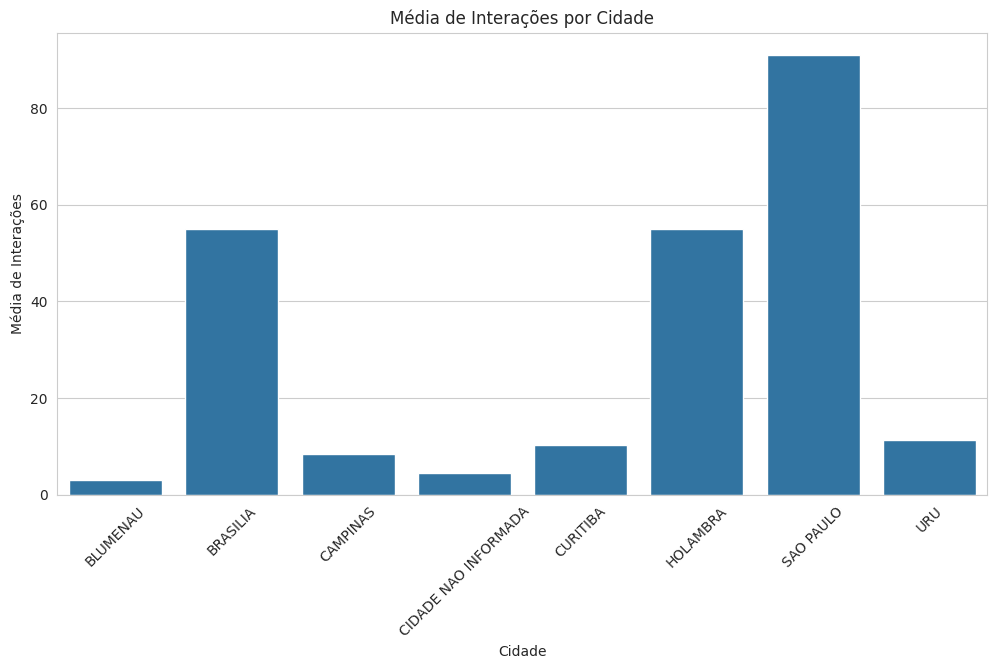

In [247]:
# M√©dia de engajamento por cidade
city_stats = df.groupby('ds_cidade_usuario')[['nr_interacoes_usuario',
                                              'vl_desempenho_usuario',
                                              'nr_questionarios_finalizados']].mean().reset_index()

# Gr√°fico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=city_stats, x='ds_cidade_usuario', y='nr_interacoes_usuario')
plt.xticks(rotation=45)
plt.title('M√©dia de Intera√ß√µes por Cidade')
plt.xlabel('Cidade')
plt.ylabel('M√©dia de Intera√ß√µes')
plt.show()

### 5.2 Distribui√ß√£o do Desempenho Geral dos Alunos

O gr√°fico de desempenho mostra como os alunos est√£o performando academicamente, com base na m√©trica `vl_desempenho_usuario`, que varia de 0 a 1. Indicando uma concentra√ß√£o de alunos com √≥timo desempenho e muitos com nenhum

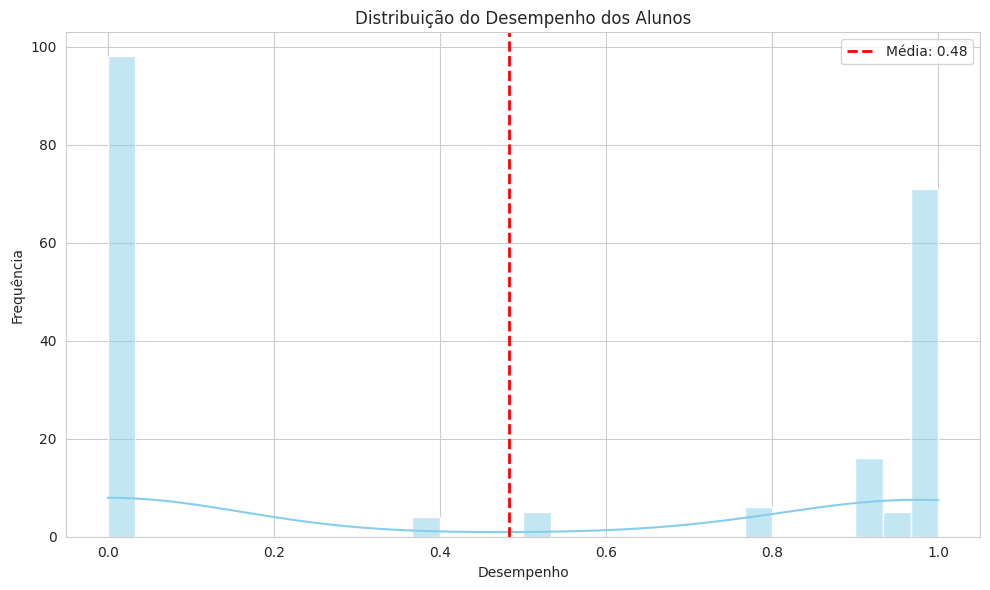

In [248]:
df['vl_desempenho_usuario'] = pd.to_numeric(df['vl_desempenho_usuario'], errors='coerce')
media_geral = df['vl_desempenho_usuario'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(df['vl_desempenho_usuario'], bins=30, kde=True, color='skyblue')
plt.axvline(media_geral, color='red', linestyle='--', linewidth=2, label=f'M√©dia: {media_geral:.2f}')
plt.title('Distribui√ß√£o do Desempenho dos Alunos')
plt.xlabel('Desempenho')
plt.ylabel('Frequ√™ncia')
plt.legend()
plt.tight_layout()
plt.show()


### 5.3 An√°lise de Inatividade

Esse gr√°fico analisa o comportamento de uso da plataforma, mostrando h√° quantos dias cada usu√°rio realizou seu √∫ltimo acesso.

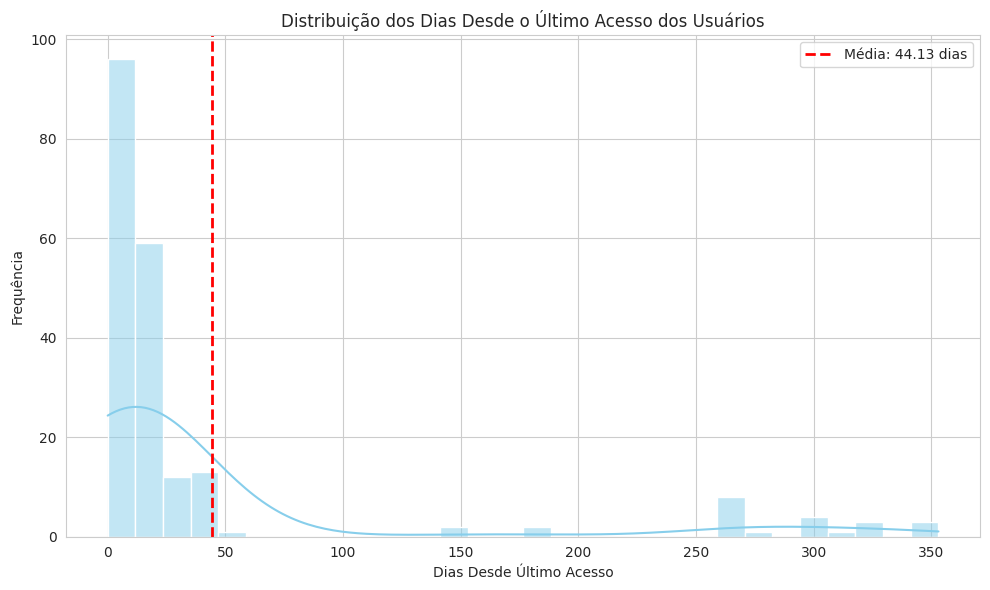

In [249]:

# Selecionar  a coluna de dias desde o √∫ltimo acesso
dias = df['nr_dias_desde_ultimo_acesso']

# Calcular a m√©dia
media_dias = dias.mean()

# Plotar histograma com KDE (curva de densidade)
plt.figure(figsize=(10, 6))
sns.histplot(dias, bins=30, kde=True, color='skyblue')

# Adicionar linha da m√©dia
plt.axvline(media_dias, color='red', linestyle='--', linewidth=2, label=f'M√©dia: {media_dias:.2f} dias')

# T√≠tulos e eixos
plt.title("Distribui√ß√£o dos Dias Desde o √öltimo Acesso dos Usu√°rios")
plt.xlabel("Dias Desde √öltimo Acesso")
plt.ylabel("Frequ√™ncia")
plt.legend()
plt.tight_layout()
plt.show()


## 6. Engenharia e Sele√ß√£o de Features

Com base nessas an√°lises sobre engajamento e desempenho dos alunos, criaremos uma vari√°vel chamada `evadiu`.  
Essa vari√°vel simula o comportamento de evas√£o, permitindo que possamos identificar alunos com maior risco de abandono do curso.

### 6.1 Cria√ß√£o da vari√°vel `evadiu`

Criamos uma nova coluna `evadiu` para simular o comportamento de evas√£o, utilizando a seguinte l√≥gica:

> Se o aluno **nunca obteve desempenho** (`vl_desempenho_usuario = 0`) e est√° **h√° mais de 12 dias sem acessar a plataforma**, consideramos que ele evadiu.

Essa coluna √© bin√°ria:
- `1` ‚Üí aluno evadiu
- `0` ‚Üí aluno ativo ou ainda engajado


In [250]:
df["vl_desempenho_usuario"] = pd.to_numeric(df["vl_desempenho_usuario"], errors="coerce")
df["evadiu"] = df["nr_dias_desde_ultimo_acesso"] <= 12

#### Compara√ß√£o entre evasores e n√£o evasores

Com a vari√°vel `evadiu` criada, comparamos os dois grupos em rela√ß√£o a:
- N√∫mero de intera√ß√µes
- Question√°rios finalizados
- Submiss√µes de c√≥digo
- Desempenho geral

Isso nos ajuda a entender quais comportamentos est√£o mais associados √† evas√£o.

In [251]:
# Comparar m√©dias de vari√°veis entre evasores e n√£o evasores
media_por_grupo = df.groupby("evadiu")[
    ["nr_interacoes_usuario", "nr_questionarios_finalizados", "vl_desempenho_usuario", "nr_submissoes_codigo"]
].mean().round(2)

media_por_grupo


nr_interacoes_usuario  nr_questionarios_finalizados  \
evadiu                                                        
False                    8.34                          3.34   
True                    12.19                          2.35   

        vl_desempenho_usuario  nr_submissoes_codigo  
evadiu                                               
False                    0.34                   0.0  
True                     0.62                   2.0

### 6.2 Classifica√ß√£o de Perfis de Risco

A partir das vari√°veis `vl_desempenho_usuario` e `nr_dias_desde_ultimo_acesso`, classificamos cada aluno em um dos seguintes perfis:

| Perfil            | Crit√©rio                                              |
|-------------------|-------------------------------------------------------|
| Alto Risco        | Desempenho = 0 e sem acesso h√° mais de 12 dias        |
| Reengajamento     | Bom desempenho, mas inativo h√° mais de 12 dias        |
| Apoio Pedag√≥gico  | Acessa, mas desempenho muito baixo                    |
| Est√°vel           | Acessa com frequ√™ncia e tem bom desempenho            |


In [252]:
# Classificar alunos em perfis com base em desempenho e atividade
def perfil(row):
    if row["vl_desempenho_usuario"] == 0 and row["nr_dias_desde_ultimo_acesso"] > 12:
        return "Alto Risco"
    elif row["vl_desempenho_usuario"] > 0.7 and row["nr_dias_desde_ultimo_acesso"] > 12:
        return "Reengajamento"
    elif row["vl_desempenho_usuario"] < 0.3:
        return "Apoio Pedag√≥gico"
    else:
        return "Est√°vel"

df["perfil"] = df.apply(perfil, axis=1)


#### Contagem de Perfis

Finalizamos com a contagem de alunos em cada perfil. Isso nos ajuda a:

- Visualizar a distribui√ß√£o de risco na base de dados
- Compreender o tamanho de cada grupo e onde priorizar interven√ß√µes

Essa segmenta√ß√£o √© essencial tanto para an√°lise quanto para futuras estrat√©gias de reengajamento ou previs√£o automatizada da evas√£o.

In [253]:
# Contar a quantidade de alunos em cada perfil
df["perfil"].value_counts().reset_index().rename(columns={"index": "perfil", "perfil": "quantidade"})


quantidade  count
0           Est√°vel     77
1        Alto Risco     59
2  Apoio Pedag√≥gico     39
3     Reengajamento     30

### 6.3 Pr√©-Processamento dos Dados para Modelagem

**Sele√ß√£o de Atributos**: removemos vari√°veis que n√£o ser√£o usadas como entrada no modelo, como:
   - `evadiu` (alvo da predi√ß√£o)
   - `perfil` (j√° √© um agrupamento explicativo derivado das features)
   - `ds_cidade_usuario` (categ√≥rica n√£o transformada)

In [254]:
y = df["evadiu"]

In [255]:
X = df.drop(columns=["evadiu", "perfil", "ds_cidade_usuario", "nr_dias_desde_ultimo_acesso"], errors="ignore")

**Exclus√£o de colunas do tipo `datetime64`:**
   - Modelos de ML n√£o entendem datas diretamente.
   - Em vez disso, j√° transformamos essas colunas em atributos √∫teis como `nr_dias_desde_ultimo_acesso`.

In [256]:
X = X.select_dtypes(exclude=["datetime64[ns]"])

Usamos `StandardScaler` para padronizar as vari√°veis num√©ricas, transformando-as para que tenham **m√©dia 0 e desvio padr√£o 1**. Isso √© especialmente importante para algoritmos como redes neurais e modelos baseados em dist√¢ncia (ex: SVM), que s√£o sens√≠veis √† escala dos dados.

In [257]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

**Separa√ß√£o dos Conjuntos de Treino e Teste**: dividimos os dados em 80% para treino e 20% para teste, garantindo que a propor√ß√£o de evasores e n√£o evasores seja mantida (com `stratify`).

In [258]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

**Verifica√ß√£o de Balanceamento**: imprimimos a distribui√ß√£o das classes (evadiu = 0 ou 1) no conjunto de treino, o que ajuda a identificar se t√©cnicas adicionais de balanceamento ser√£o necess√°rias no modelo.

In [259]:
unique, counts = np.unique(y_train, return_counts=True)
print("Distribui√ß√£o de 'evadiu' no treino:", dict(zip(unique, counts)))

Distribui√ß√£o de 'evadiu' no treino: {np.False_: np.int64(78), np.True_: np.int64(86)}


## 7. Modelagem

### 7.1 Regress√£o Log√≠stica


Usamos regress√£o log√≠stica por ser um modelo simples e interpret√°vel, √≥timo para come√ßar problemas de classifica√ß√£o bin√°ria como ‚Äúevadiu ou n√£o‚Äù.

In [ ]:
## Treinamento do modelo
log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Avalia√ß√£o do modelo
print("Relat√≥rio - Regress√£o Log√≠stica")
print(classification_report(y_test, y_pred_log))

Relat√≥rio - Regress√£o Log√≠stica
              precision    recall  f1-score   support

       False       0.75      0.90      0.82        20
        True       0.88      0.71      0.79        21

    accuracy                           0.80        41
   macro avg       0.82      0.81      0.80        41
weighted avg       0.82      0.80      0.80        41



#### An√°lise dos resutlados:
O relat√≥rio mostra que a regress√£o log√≠stica conseguiu um bom equil√≠brio entre **precis√£o**, **recall** e **F1-score** para ambas as classes.

O modelo teve desempenho consistente, sendo capaz de **identificar tanto evasores quanto alunos ativos** com qualidade.  
Por ser um modelo mais simples e interpret√°vel, a regress√£o log√≠stica pode ser uma boa refer√™ncia ou baseline para compara√ß√£o com modelos mais complexos.

### 7.2 Random Forest

Em seguida, testamos o Random Forest, ajustando hiperpar√¢metros como `max_depth` e `min_samples_leaf` para evitar overfitting e utilizando `class_weight='balanced'` para lidar com o leve desbalanceamento de classes.

In [262]:
## Random Forest
rf_model = RandomForestClassifier(
    random_state=42,
    max_depth=5,
    min_samples_leaf=2,
    n_estimators=700,
    class_weight='balanced'
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRelat√≥rio - Random Forest")
print(classification_report(y_test, y_pred_rf))


Relat√≥rio - Random Forest
              precision    recall  f1-score   support

       False       0.87      1.00      0.93        20
        True       1.00      0.86      0.92        21

    accuracy                           0.93        41
   macro avg       0.93      0.93      0.93        41
weighted avg       0.94      0.93      0.93        41



#### An√°lise de resultado:
O modelo Random Forest apresentou **excelente desempenho** em termos de precis√£o, recall e F1-score para ambas as classes.

Com o uso do par√¢metro `class_weight='balanced'`, o modelo conseguiu lidar bem com o desbalanceamento dos dados, mostrando-se eficaz em **identificar tanto evasores quanto n√£o evasores**.

Esse resultado refor√ßa o potencial da Random Forest como uma solu√ß√£o robusta e confi√°vel para o problema de evas√£o.

Aqui comparamos graficamente os acertos e erros de cada modelo (Logistic Regression e Random Forest). As matrizes mostram quantos alunos foram corretamente ou incorretamente classificados como evadidos ou n√£o evadidos.

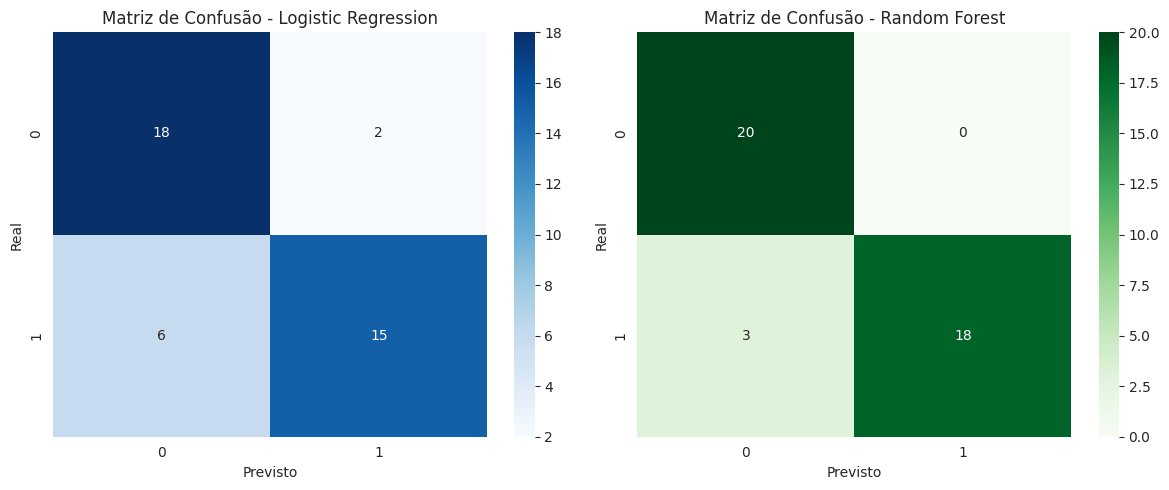

In [263]:
# Matrizes de confus√£o
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Visualiza√ß√£o das matrizes de confus√£o
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_log, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confus√£o - Logistic Regression")
plt.xlabel("Previsto")
plt.ylabel("Real")

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Matriz de Confus√£o - Random Forest")
plt.xlabel("Previsto")
plt.ylabel("Real")

plt.tight_layout()
plt.show()

Utilizamos valida√ß√£o cruzada com 5 divis√µes (stratified) para avaliar a estabilidade dos modelos. O F1-score m√©dio e o desvio padr√£o mostram se o desempenho se mant√©m consistente em diferentes partes do conjunto de treino.

In [264]:
# Valida√ß√£o Cruzada para conferir estabilidade dos modelos
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores_log = cross_val_score(log_model, X_train, y_train, cv=cv, scoring="f1")
scores_rf = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring="f1")

print("\nF1-score - Cross Validation")
print(f"Regress√£o Log√≠stica: {scores_log.mean():.4f} ¬± {scores_log.std():.4f}")
print(f"Random Forest: {scores_rf.mean():.4f} ¬± {scores_rf.std():.4f}")


F1-score - Cross Validation
Regress√£o Log√≠stica: 0.8071 ¬± 0.0850
Random Forest: 0.9599 ¬± 0.0390


A valida√ß√£o cruzada foi usada para verificar a **estabilidade e consist√™ncia dos modelos** em diferentes divis√µes dos dados de treino.

Os resultados mostram que ambos os modelos apresentaram **desempenho est√°vel**, com destaque para a Random Forest, que teve m√©dia de F1-score mais alta e baixa varia√ß√£o entre as dobras.

Essa an√°lise refor√ßa a confiabilidade da Random Forest como uma das melhores op√ß√µes para o problema de evas√£o.

### 7.3 Rede Neural

Implementamos um modelo de Rede Neural com duas camadas ocultas e Dropout para regulariza√ß√£o, buscando capturar padr√µes ainda mais complexos.

In [ ]:
# Cria√ß√£o do modelo
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # sa√≠da bin√°ria

# Compila√ß√£o
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping para evitar overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Treinamento
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
9/9 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 86ms/step - accuracy: 0.4811 - loss: 0.9695 - val_accuracy: 0.6364 - val_loss: 0.7923
Epoch 2/100
9/9 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 37ms/step - accuracy: 0.5181 - loss: 0.7670 - val_accuracy: 0.5152 - val_loss: 0.7256
Epoch 3/100
9/9 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 10ms/step - accuracy: 0.5686 - loss: 0.6931 - val_accuracy: 0.5455 - val_loss: 0.6870
Epoch 4/100
9/9 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - accuracy: 0.5812 - loss: 0.7341 - val_accuracy: 0.6364 - val_loss: 0.6547
Epoch 5/100
9/9 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - accuracy: 0.6561 - loss: 0.6340 - val_accuracy: 0.6364 - val_loss: 0.6324
Epoch 6/100
9/9 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 13ms/step - accuracy: 0.7639 - loss: 0.5859 - val_accuracy: 0.6667 - val_loss: 0.6184
Epoc

In [267]:
# Avaliar no conjunto de teste
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nRede Neural - Accuracy no teste: {accuracy:.4f}")


Rede Neural - Accuracy no teste: 0.8537


### M√©tricas complementares da Rede Neural

Acur√°cia sozinha pode ser enganosa em dados desbalanceados.  
Aqui, adicionamos o **F1-score** para avaliar o equil√≠brio entre precis√£o e recall.


In [268]:
# Calcular F1-score no conjunto de teste
from sklearn.metrics import f1_score, classification_report

y_pred_nn = (model.predict(X_test) > 0.5).astype(int)

f1 = f1_score(y_test, y_pred_nn)
print(f"F1-score da Rede Neural no teste: {f1:.4f}")

2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 52ms/step
F1-score da Rede Neural no teste: 0.8571


In [269]:
# (opcional) Relat√≥rio completo
print(classification_report(y_test, y_pred_nn))

              precision    recall  f1-score   support

       False       0.85      0.85      0.85        20
        True       0.86      0.86      0.86        21

    accuracy                           0.85        41
   macro avg       0.85      0.85      0.85        41
weighted avg       0.85      0.85      0.85        41



#### An√°lise do Resultado
O modelo est√° √≥timo em recall para evasores (identifica bem quem vai evadir)

A precis√£o √© um pouco menor, ou seja, ele erra algumas vezes prevendo evas√£o onde n√£o h√° (falsos positivos)

Isso √© bom para casos onde √© melhor prevenir do que remediar ‚Äî como alertar risco de evas√£o

## 8. Valida√ß√£o e Compara√ß√£o dos Modelos

### 8.1 Matriz de Confus√£o - Rede Neural

A matriz de confus√£o mostra que a rede neural conseguiu identificar bem os dois grupos: alunos que evadiram e os que permaneceram ativos.

Observamos um bom equil√≠brio entre **falsos positivos** e **falsos negativos**, o que indica que o modelo est√° **conseguindo capturar os padr√µes de evas√£o de forma eficaz**, mesmo com o desbalanceamento entre as classes.

Essa visualiza√ß√£o refor√ßa que a rede est√° aprendendo de forma coerente com a distribui√ß√£o dos dados.

2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 19ms/step


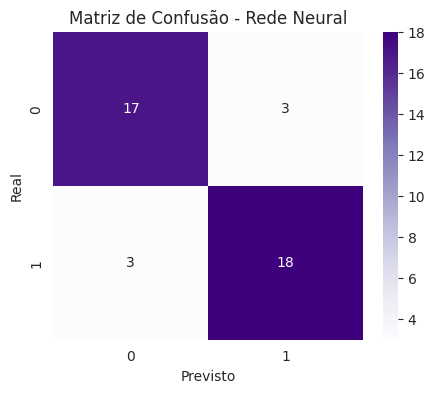

In [270]:
from sklearn.metrics import confusion_matrix

# Previs√£o
y_pred_nn = model.predict(X_test)
y_pred_nn_classes = (y_pred_nn > 0.5).astype("int")

# Matriz de confus√£o
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn_classes)

# Visualiza√ß√£o
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_nn, annot=True, fmt="d", cmap="Purples")
plt.title("Matriz de Confus√£o - Rede Neural")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()


### 8.2 Evolu√ß√£o da Acur√°cia
O gr√°fico mostra que a acur√°cia aumentou consistentemente ao longo das √©pocas, tanto no treino quanto na valida√ß√£o. Isso indica que o modelo est√° aprendendo bem, sem sinais evidentes de overfitting, j√° que as curvas permanecem pr√≥ximas.

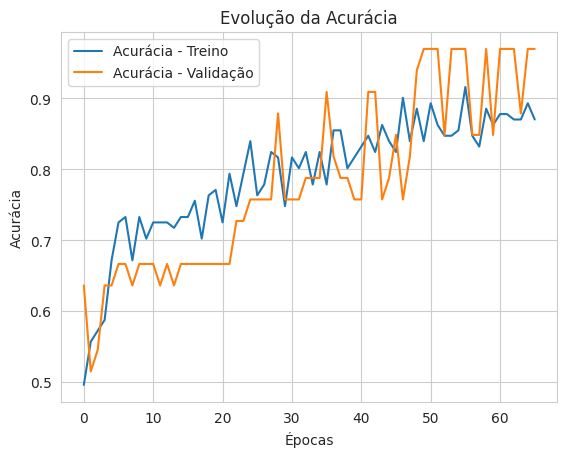

In [271]:
import matplotlib.pyplot as plt

# Plotando a acur√°cia e perda durante o treinamento
plt.plot(history.history['accuracy'], label='Acur√°cia - Treino')
plt.plot(history.history['val_accuracy'], label='Acur√°cia - Valida√ß√£o')
plt.xlabel('√âpocas')
plt.ylabel('Acur√°cia')
plt.legend()
plt.title('Evolu√ß√£o da Acur√°cia')
plt.show()

##  9. Avalia√ß√£o final no conjunto de teste real

Esta √© a etapa mais importante: validar nosso melhor modelo em um conjunto de dados completamente novo, que simula um ambiente de produ√ß√£o.

### 9.1 Prepara√ß√£o dos Dados de Teste

Aplicamos exatamente os mesmos passos de limpeza e pr√©-processamento que foram usados nos dados de treino.

In [ ]:
df_teste_real = pd.read_csv("dados_projeto_evasao_teste - Copia.csv")

In [ ]:
df_teste_real.head()

Unnamed: 0 ds_cidade_usuario  ts_primeiro_acesso  ts_ultimo_acesso  \
0         361          Campinas          1693227920        1693228016   
1          73          Holambra          1661542019        1662149939   
2         374          Campinas          1693578285        1694298462   
3         155          Campinas          1690827091        1690827413   
4         104          Campinas                   0                 0   

   nr_dias_desde_primeiro_acesso  nr_dias_desde_ultimo_acesso  \
0                             14                           14   
1                            381                          374   
2                             10                            2   
3                             42                           42   
4                          19612                        19612   

   nr_atividades_sinalizadas  nr_atividades_mapeadas  \
0                          0                       0   
1                          0                      14   
2                          0                       0   
3                          0                       0   
4                          0                       0   

   nr_discussoes_forum_postadas  nr_questionarios_abandonados  ...  \
0                             0                             0  ...   
1                             0                             0  ...   
2                             0                             0  ...   
3                             0                             0  ...   
4                             0                             0  ...   

   nr_questoes_parciais  vl_desempenho_usuario  vl_media_questoes_por_dia  \
0                     0                    NaN                        NaN   
1                     0               0.133333                     0.3061   
2                     1               0.986014                     0.8571   
3                     0                    NaN                        NaN   
4                     0                    NaN                        NaN   

   vl_engajamento_notas  nr_itens_avaliados  nr_itens_nao_respondidos  \
0                   NaN                   0                         0   
1                0.1633                  15                       144   
2                0.5714                   6                        57   
3                   NaN                   0                         0   
4                   NaN                   0                         0   

   vl_media_notas  nr_submissoes_codigo  vl_media_submissoes_codigo  \
0             NaN                     0                         NaN   
1        0.133333                     0                         NaN   
2        0.984849                     0                         NaN   
3             NaN                     0                         NaN   
4             NaN                     0                         NaN   

   vl_submissoes_por_dias_ativos  
0                            NaN  
1                            NaN  
2                            NaN  
3                            NaN  
4                            NaN  

[5 rows x 37 columns]

In [ ]:
df_teste_real = df_teste_real.drop("Unnamed: 0", axis=1)

In [ ]:
df_teste_real = df_teste_real[df_teste_real['ts_primeiro_acesso'] != 0]

In [ ]:
df_teste_real['ts_primeiro_acesso'] = pd.to_datetime(df_teste_real['ts_primeiro_acesso'], unit='s')
df_teste_real['ts_ultimo_acesso'] = pd.to_datetime(df_teste_real['ts_ultimo_acesso'], unit='s')

In [ ]:
print(df_teste_real['ds_cidade_usuario'].unique())

['Campinas' 'Holambra' nan 'Blumenau ' 'Curitiba' 'brasilia' 'curitiba'
 'S√£o Paulo']


In [ ]:
df_teste_real['ds_cidade_usuario'] = (
    df_teste_real['ds_cidade_usuario']
    .astype(str)
    .str.strip()
    .str.upper()
    .apply(unidecode.unidecode)
)

In [ ]:
df_teste_real['ds_cidade_usuario'].replace("NAN", "CIDADE NAO INFORMADA", inplace=True)

/tmp/ipython-input-279-4060251615.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_teste_real['ds_cidade_usuario'].replace("NAN", "CIDADE NAO INFORMADA", inplace=True)


In [ ]:
print(df_teste_real['ds_cidade_usuario'].unique())

['CAMPINAS' 'HOLAMBRA' 'CIDADE NAO INFORMADA' 'BLUMENAU' 'CURITIBA'
 'BRASILIA' 'SAO PAULO']


In [ ]:
# Remover colunas com mais de 70% de valores ausentes
df_teste_real.drop(columns=["vl_media_submissoes_codigo", "vl_submissoes_por_dias_ativos"], inplace=True)
df_teste_real.drop(columns=["vl_media_questoes_por_dia", "vl_engajamento_notas"], inplace=True)

In [ ]:
# Preencher a coluna de desempenho com zero
df_teste_real["vl_desempenho_questionario"] = df_teste_real["vl_desempenho_questionario"].fillna(0)
df_teste_real["vl_engajamento_usuario_por_intervalo"] = df_teste_real["vl_engajamento_usuario_por_intervalo"].fillna(0)
df_teste_real["vl_engajamento_usuario_intradia"] = df_teste_real["vl_engajamento_usuario_intradia"].fillna(0)
df_teste_real["vl_desempenho_usuario"] = df_teste_real["vl_desempenho_usuario"].fillna(0)
df_teste_real["vl_media_notas"] = df_teste_real["vl_media_notas"].fillna(0)

In [ ]:
#Preencher com mediana (tempo m√©dio tem sentido cont√≠nuo e compar√°vel):
df_teste_real["vl_medio_tempo_questionario"] = df_teste_real["vl_medio_tempo_questionario"].fillna(df_teste_real["vl_medio_tempo_questionario"].median())
df_teste_real["vl_medio_tempo_questionario_avaliado"] = df_teste_real["vl_medio_tempo_questionario_avaliado"].fillna(df_teste_real["vl_medio_tempo_questionario_avaliado"].median())

In [ ]:
df_teste_real.head()

ds_cidade_usuario  ts_primeiro_acesso    ts_ultimo_acesso  \
0           CAMPINAS 2023-08-28 13:05:20 2023-08-28 13:06:56   
1           HOLAMBRA 2022-08-26 19:26:59 2022-09-02 20:18:59   
2           CAMPINAS 2023-09-01 14:24:45 2023-09-09 22:27:42   
3           CAMPINAS 2023-07-31 18:11:31 2023-07-31 18:16:53   
11          CAMPINAS 2023-08-04 14:00:33 2023-09-04 14:28:27   

    nr_dias_desde_primeiro_acesso  nr_dias_desde_ultimo_acesso  \
0                              14                           14   
1                             381                          374   
2                              10                            2   
3                              42                           42   
11                             38                            7   

    nr_atividades_sinalizadas  nr_atividades_mapeadas  \
0                           0                       0   
1                           0                      14   
2                           0                       0   
3                           0                       0   
11                          0                       0   

    nr_discussoes_forum_postadas  nr_questionarios_abandonados  \
0                              0                             0   
1                              0                             0   
2                              0                             0   
3                              0                             0   
11                             0                             0   

    nr_questionarios_finalizados  ...  nr_engajamento_questionario  \
0                              0  ...                            0   
1                              1  ...                           19   
2                              3  ...                           62   
3                              0  ...                            0   
11                             2  ...                           78   

    nr_questoes_respondidas  nr_questoes_corretas  nr_questoes_erradas  \
0                         0                     0                    0   
1                         7                     5                    0   
2                        59                    41                   15   
3                         0                     0                    0   
11                       58                    54                    3   

    nr_questoes_parciais  vl_desempenho_usuario  nr_itens_avaliados  \
0                      0               0.000000                   0   
1                      0               0.133333                  15   
2                      1               0.986014                   6   
3                      0               0.000000                   0   
11                     0               1.000000                   1   

    nr_itens_nao_respondidos  vl_media_notas  nr_submissoes_codigo  
0                          0        0.000000                     0  
1                        144        0.133333                     0  
2                         57        0.984849                     0  
3                          0        0.000000                     0  
11                        62        1.000000                     0  

[5 rows x 32 columns]

In [ ]:
df_teste_real.to_csv("dados_teste_convertidos.csv", index=False)

In [ ]:
# Garantir que est√° como n√∫mero
df_teste_real["vl_desempenho_usuario"] = pd.to_numeric(df_teste_real["vl_desempenho_usuario"], errors="coerce")

# Criar a coluna 'evadiu' com a mesma regra
df_teste_real["evadiu"] = df_teste_real["nr_dias_desde_ultimo_acesso"] <= 12

# Agora sim pode separar o y_teste_real
y_teste_real = df_teste_real["evadiu"]


### 9.2 Pr√©-processamento do teste

In [ ]:
# Seleciona os mesmos atributos (remove colunas irrelevantes e alvo)
X_teste_real = df_teste_real.drop(
    columns=["perfil", "ds_cidade_usuario", "nr_dias_desde_ultimo_acesso", "evadiu"],
    errors="ignore"
)

# Remove colunas do tipo datetime
X_teste_real = X_teste_real.select_dtypes(exclude=["datetime64[ns]"])

# Aplica o mesmo scaler (usando apenas .transform, sem .fit!)
X_teste_real_scaled = pd.DataFrame(
    scaler.transform(X_teste_real),
    columns=X_teste_real.columns
)


### 9.3 Performance dos modelos

Avaliamos os tr√™s modelos no conjunto de teste real para verificar qual deles tem o melhor desempenho em prever a evas√£o dos alunos.

#### Random Forest

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score, confusion_matrix

# Previs√µes com Random Forest
y_pred_real = rf_model.predict(X_teste_real_scaled)
y_proba_real = rf_model.predict_proba(X_teste_real_scaled)[:, 1]

# M√©tricas Finais
print("üîç Avalia√ß√£o do Modelo (Random Forest)")
print(f"Acur√°cia:  {accuracy_score(y_teste_real, y_pred_real):.4f}")
print(f"F1-score:  {f1_score(y_teste_real, y_pred_real):.4f}")
print(f"AUC:       {roc_auc_score(y_teste_real, y_proba_real):.4f}")

üîç Avalia√ß√£o do Modelo (Random Forest)
Acur√°cia:  0.8696
F1-score:  0.8571
AUC:       0.9887


#### Regress√£o Log√≠stica

In [ ]:
# # Previs√µes com Regress√£o Log√≠stica
y_pred_log = log_model.predict(X_teste_real_scaled)
y_proba_log = log_model.predict_proba(X_teste_real_scaled)[:, 1]

# M√©tricas Finais
print("\nRegress√£o Log√≠stica:")
print("F1:", f1_score(y_teste_real, y_pred_log))
print("Recall:", recall_score(y_teste_real, y_pred_log))
print("AUC:", roc_auc_score(y_teste_real, y_proba_log))


Regress√£o Log√≠stica:
F1: 0.8888888888888888
Recall: 0.8695652173913043
AUC: 0.9565217391304348


#### Rede Neural

In [ ]:
# Previs√µes com Rede Neural
y_proba_nn = model.predict(X_teste_real_scaled).ravel()
y_pred_nn = (y_proba_nn > 0.5).astype(int)

# M√©tricas Finais
print("\nRede Neural:")
print("F1:", f1_score(y_teste_real, y_pred_nn))
print("Recall:", recall_score(y_teste_real, y_pred_nn))
print("AUC:", roc_auc_score(y_teste_real, y_proba_nn))

2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 29ms/step

Rede Neural:
F1: 0.9361702127659575
Recall: 0.9565217391304348
AUC: 0.9546313799621928


#### An√°lise do Resultado:
O modelo de Rede Neural foi o que teve o melhor desempenho geral, com os maiores valores de F1-score e recall, o que √© importante para detectar corretamente quem vai evadir.

Al√©m disso, ele manteve um bom equil√≠brio entre precis√£o e sensibilidade.

Por isso, escolhemos a Rede Neural como modelo final para prever a evas√£o no teste real.

### 9.4 Matriz de Confus√£o - Teste Real

A matriz mostra que o modelo teve excelente desempenho para identificar alunos que evadiram (22 acertos) e tamb√©m bom desempenho com os que n√£o evadiram (21 acertos).

Cometeu apenas 2 falsos positivos, prevendo evas√£o para alunos que estavam ativos, e 1 falso negativo, classificando incorretamente um aluno evadido como ativo.

Esses resultados indicam que a Rede Neural teve √≥timo equil√≠brio entre precis√£o e recall, sendo o modelo que melhor generalizou no teste final.


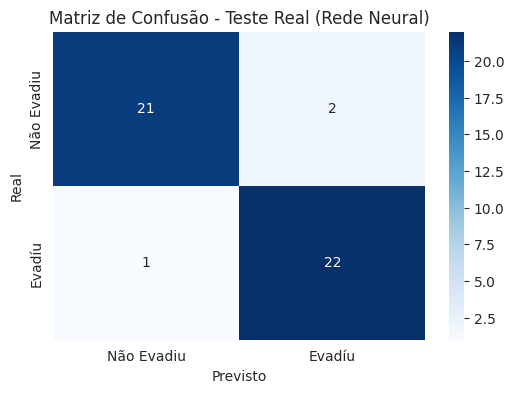

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Usar os valores previstos da Rede Neural
cm = confusion_matrix(y_teste_real, y_pred_nn)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["N√£o Evadiu", "Evad√≠u"],
            yticklabels=["N√£o Evadiu", "Evad√≠u"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confus√£o - Teste Real (Rede Neural)")
plt.show()

### 9.5 Curva ROC no Teste Real

A curva ROC da Rede Neural indica um √≥timo desempenho na separa√ß√£o entre alunos que evadiram e os que n√£o evadiram, com uma AUC de 0.95.

Esse valor mostra que o modelo tem alta capacidade preditiva, sendo eficaz na distin√ß√£o entre as classes. Quanto mais pr√≥ximo de 1, melhor ‚Äî e neste caso, o resultado √© muito positivo.


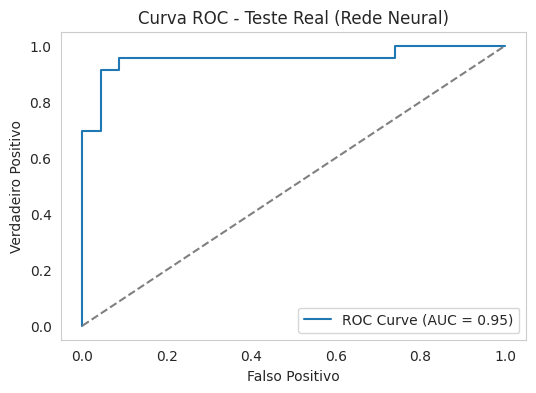

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_teste_real, y_proba_nn)
auc = roc_auc_score(y_teste_real, y_proba_nn)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Falso Positivo")
plt.ylabel("Verdadeiro Positivo")
plt.title("Curva ROC - Teste Real (Rede Neural)")
plt.legend()
plt.grid()
plt.show()

### 9.6 Curva Precis√£o x Recall

A curva mostra que o modelo de Rede Neural manteve alta precis√£o mesmo com altos n√≠veis de recall, ou seja, conseguiu identificar corretamente muitos evasores sem perder acur√°cia nas previs√µes.

Isso indica bom equil√≠brio entre precis√£o e recall, o que √© essencial em problemas desbalanceados, como a previs√£o de evas√£o.

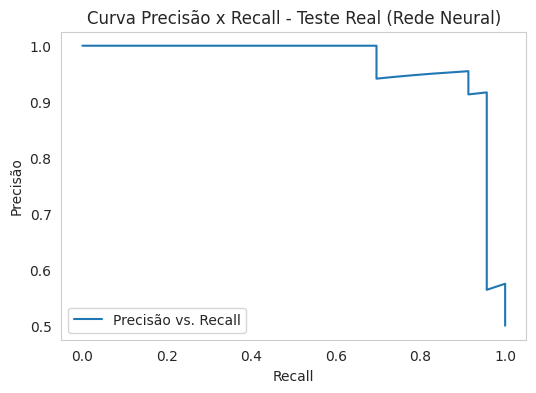

In [ ]:
from sklearn.metrics import precision_recall_curve

prec, rec, _ = precision_recall_curve(y_teste_real, y_proba_nn)

plt.figure(figsize=(6, 4))
plt.plot(rec, prec, label="Precis√£o vs. Recall")
plt.xlabel("Recall")
plt.ylabel("Precis√£o")
plt.title("Curva Precis√£o x Recall - Teste Real (Rede Neural)")
plt.grid()
plt.legend()
plt.show()

Propor√ß√£o de Evasores

A propor√ß√£o de alunos evadidos foi semelhante entre treino (52%) e teste real (50%), o que indica uma boa estratifica√ß√£o dos dados e evita vi√©s na avalia√ß√£o do modelo.

In [ ]:
# Comparar propor√ß√£o de evasores
print("Treino:", y_train.mean())
print("Teste Real:", y_teste_real.mean())


Treino: 0.524390243902439
Teste Real: 0.5
